# Kalman filtering
> I have wanted to understand the Kalman filter for a long time. It is supposed to be very good to filter measurements from a dynamic system as a ship. Here are my notes about basic Kalman filtering.

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [dynamics, kalman filter]
- image: images/kalman.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

I found an example from the [scipy-cookbook](https://scipy-cookbook.readthedocs.io/items/KalmanFiltering.html), which was taken from [An Introduction to the Kalman Filter](https://www.cs.unc.edu/~welch/media/pdf/kalman_intro.pdf). I will implement the same thing here, by dissecting the example from the [scipy-cookbook](https://scipy-cookbook.readthedocs.io/items/KalmanFiltering.html).

In [1]:
#hide
import warnings
warnings.filterwarnings("ignore")

In [2]:
#collapse
import numpy as np
import matplotlib.pyplot as plt

## scipy-cookbook
Here is the implementation from the [scipy-cookbook](https://scipy-cookbook.readthedocs.io/items/KalmanFiltering.html):

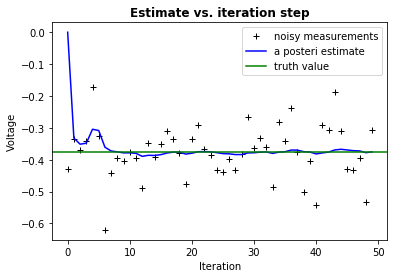

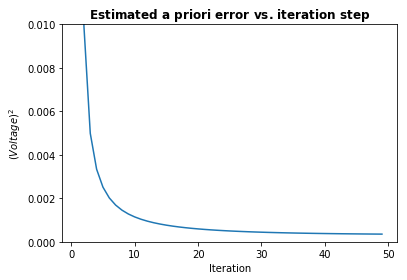

In [3]:
#collapse
# Kalman filter example demo in Python

# A Python implementation of the example given in pages 11-15 of "An
# Introduction to the Kalman Filter" by Greg Welch and Gary Bishop,
# University of North Carolina at Chapel Hill, Department of Computer
# Science, TR 95-041,
# https://www.cs.unc.edu/~welch/media/pdf/kalman_intro.pdf

# by Andrew D. Straw

# intial parameters
n_iter = 50
sz = (n_iter,) # size of array
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01]);

...so it seems that we want to filter some noisy measurements of voltage in this case.

## My rough idea about Kalman filter
From what I have seen of the Kalman filter before my rough understanding is this: you think that you have some kind of understanding of the system that you are measuring, why not use this as a part of the filtering? 

Consider the measurement of the position of a large ship: let's say the there is a "spike" in this signal. Lets also say that this spike has acceleration that would need an enormous force to be generated (considering the large mass of the ship). This enormous force is extremely unlikely and can be disregarding. So using your knowledge about the dynamics of the system you are observing to do filtering makes a lot of sense. 

I usually use low pass filtering of the model test measurements however, this filter does not "know" so much about the system that generated the signal. The only knowledge you add to a low pass filter is that you say that frequencies above a certain treshold cannot have been generated by the system you are interested in and should therefore be removed.

In the Kalman filter you add much more information about the system by adding a simulation model of the system that tries to predict the signal. The simulation model prediction and measurements "live" side by side. Both the prediction and measurement may contain errors (model errors or measurements errors) so the Kalman filter algorithm merges these two and the algorithm decide how much to trust the prediction or measurements based on how well they perform.
